Train on 3900 samples, validate on 975 samples
Epoch 1/10
3900/3900 [==============================] - 1s 210us/step - loss: 0.0737 - acc: 0.4954 - val_loss: 0.0563 - val_acc: 0.7056
Epoch 2/10
3900/3900 [==============================] - 0s 25us/step - loss: 0.0484 - acc: 0.7546 - val_loss: 0.0399 - val_acc: 0.8164
Epoch 3/10
3900/3900 [==============================] - 0s 24us/step - loss: 0.0357 - acc: 0.8351 - val_loss: 0.0318 - val_acc: 0.8390
Epoch 4/10
3900/3900 [==============================] - 0s 28us/step - loss: 0.0286 - acc: 0.8633 - val_loss: 0.0276 - val_acc: 0.8718
Epoch 5/10
3900/3900 [==============================] - 0s 26us/step - loss: 0.0244 - acc: 0.8813 - val_loss: 0.0243 - val_acc: 0.8708
Epoch 6/10
3900/3900 [==============================] - 0s 25us/step - loss: 0.0213 - acc: 0.8838 - val_loss: 0.0225 - val_acc: 0.8738
Epoch 7/10
3900/3900 [==============================] - 0s 25us/step - loss: 0.0188 - acc: 0.9003 - val_loss: 0.0196 - val_acc: 0.8831
Epoch 8

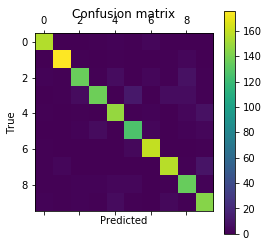

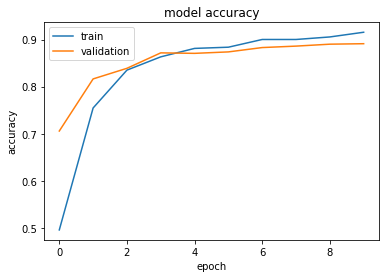

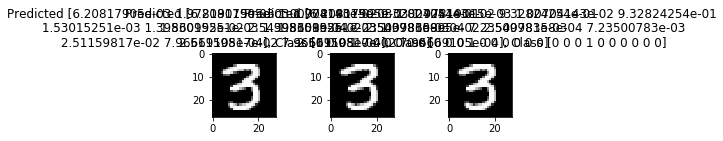

In [20]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
import keras as keras
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pylab as pl
from keras.utils import plot_model

# Load the data
labels = np.load('/Users/paritoshgoel/Desktop/ruiz/project3/mylabel.npy')
images = np.load('/Users/paritoshgoel/Desktop/ruiz/project3/images.npy')



# ============= Preprocess data =============#

#Reshaping input data
images_vector = np.reshape(images , (6500,784))
labels_vector = keras.utils.to_categorical(labels, num_classes=10, dtype='int32')

# ============ Stratified Sampling ==============

seed = 7
np.random.seed(seed)
X_fit, X_test, Y_fit, Y_test = train_test_split(images_vector, labels_vector, test_size=0.25, stratify=labels_vector, random_state=seed)
X_train,X_validate, Y_train, Y_validate = train_test_split(X_fit, Y_fit, test_size=0.20, stratify=Y_fit, random_state=seed)
# =============Preprocessing Done ===============#

# Model Template

model = Sequential() # declare model
model.add(Dense(125, input_shape=(28*28,), kernel_initializer='random_uniform')) # first layer
model.add(Activation('tanh'))

#
#
#
# Fill in Model Here
#

#



model.add(Dense(10, kernel_initializer='random_uniform')) # last layer
model.add(Activation('softmax'))


# Compile Model
model.compile(optimizer='RMSprop',
              loss='mean_squared_error',
              metrics=['accuracy'])

# Train Model


history = model.fit(X_train, Y_train,
                    validation_data = (X_validate, Y_validate),
                    epochs=10,
                    batch_size=500)


# Report Results

#print(history.history)

#predicted_classes = model.predict(X_validate)
# Check which items we got right / wrong
#correct_indices = np.nonzero(predicted_classes != Y_validate)[0]
#incorrect_indices = np.nonzero(predicted_classes != Y_test)[0]
#print(Y_validate.shape)
#print(predicted_classes.shape)
score = model.evaluate(X_validate, Y_validate)
print('Test score:', score[0])
print('Test accuracy:', score[1])
predicted_classes = model.predict(X_test)
#plot_model(model, to_file='/Users/paritoshgoel/Desktop/ruiz/Kowledge_Discovery_Data_Mining/project3/model.png')
model.save('/Users/paritoshgoel/Desktop/ruiz/Kowledge_Discovery_Data_Mining/project3/trained_model.proj3');
#Confusion Matrix
actual = [np.argmax(y, axis=None, out=None) for y in Y_test]
predicted = [np.argmax(y, axis=None, out=None) for y in predicted_classes]
cm = confusion_matrix(actual, predicted)

pl.matshow(cm)
pl.title('Confusion matrix')
pl.xlabel('Predicted')
pl.ylabel('True')
pl.colorbar()
pl.show()


#Plot the image
correct_indices = np.nonzero(predicted_classes == Y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != Y_test)[0]

pl.plot(history.history['acc'])
pl.plot(history.history['val_acc'])
pl.title('model accuracy')
pl.ylabel('accuracy')
pl.xlabel('epoch')
pl.legend(['train', 'validation'], loc='upper left')
pl.show()

pl.figure()
for i, incorrect in enumerate(incorrect_indices[:3]):
    pl.subplot(3,3,i+1)
    pl.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    pl.title("Predicted {}, Class {}".format(predicted_classes[incorrect], Y_test[incorrect]))
